<a href="https://colab.research.google.com/github/anwishn/ESAA/blob/main/1104_%EA%B3%BC%EC%A0%9C_%EB%B6%84%EB%A5%981.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 p. 183-227 (201~211 제외)

# 4단원. 분류

## 01. 분류(Classification)의 개요



---


지도학습 : 레이블, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

대표유형인 **분류(Classification)** : 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델 생성 후 미지의 레이블 값 예측하는 것


다양한 머신러닝 알고리즘으로 구현 가능
>* 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
>* 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀
>* 데이터 균일도에 따른 규칙 기반의 결정 트리
>* 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신
>* 근접 거리를 기준으로 하는 최소 근접 알고리즘
>* 심층 연결 기반의 신경망
>* 서로 다른(서로 같은) 머신러닝 알고리즘을 결합한 앙상블

* 앙상블 방법(Ensemble Method) : 매우 높은 예측 성능으로 인해 정형 데이터의 예측 분석 영역에서 애용
  + 배깅(Bagging) 방식 - 랜덤 포레스트 (많은 분석가들 애용)
  + 부스팅(Boosting) 방식 - 그래디언트 부스팅 (뛰어난 예측 성능 o but 수행 시간 오래 걸려 최적화 모델 튜닝 어려워)
  + 부스팅 계열의 최신 기법 - XGBoost 와 LightGBM, 스태킹(Stacking)

* 앙상블은 대부분 동일한 알고리즘 결합 -> 기본 알고리즘으로 결정 트리 사용
* 결정 트리 
  + 매우 쉽고 유연하게 적용, 사전 가공의 영향이 매우 적어
  + 예측 성능 향상 위해 복잡한 규칙 구조 -> 과적합 발생해 반대로 예측 성능 저하 
  + 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용

## 02. 결정 트리



---


**결정 트리(Decision Tree)** : 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것

+) 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우

* 결정 트리의 구조
> * 규칙 노드 : 규칙 조건
> * 리프 노드 : 결정된 클래스 값
> * 서브 트리 : 새로운 규칙 조건마다 생성

* 트리의 깊이가 깊어질수록(=많은 규칙이 있을수록) 결정 트리의 예측 성능 저하 => 최대한 균일한 데이터 세트 구성할 수 있도록 분할 필요

* 균일한 데이터 세트
  + 데이터 세트의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향(균일도 높을 경우 더 적은 정보 필요)
  + 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건 만들어

* 정보의 균일도 측정 방법

 1) 정보 이득 : 엔트로피 개념 기반, 1-엔트로피 지수, 정보 이득 높은 속성 기준으로 분할
    - 엔트로피 : 주어진 데이터 집합의 혼잡도/서로 다른 값 섞여 있을수록 엔트로피 높아

 2) 지니 계수 : 0이 가장 평등하고 1로 갈수록 불평등, 지니 계수 낮을수록 데이터 균일도 높은 것, 지니 계수 낮은 속성 기준으로 분할
    - 경제학 불평등 지수 나타낼 때 사용
    - 결정 트리 알고리즘 DecisionTreeClassifier : 기본으로 지니 계수 이용해 데이터 세트 분할

* 정보 이득이 높거나 지니 계수 낮은 조건 찾아 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할 멈추고 분류 결정


### 결정 트리 모델의 특징

* 장점 
> - 쉽고 직관적
> - 피처의 스케일링이나 정규화 등의 사전 가공 영향도 크지 않음

* 단점
>- 과적합으로 정확도 떨어져
>- 정확도 높이기 위해 조건 추가하면서 결과적으로 복잡한 학습 모델 => 트리의 크기 사전에 제한하는 튜닝 필요

### 결정 트리 파라미터

결정 트리 알고리즘 구현한 클래스 = DecisionTreeClassifier(분류), DecisionTreeRegressor(회귀) 

<- CART 알고리즘 기반(분류 뿐만 아니라 회귀에서도 사용)

DecisioinTreeClassifier와 DecisionTreeRegressor 모두 동일한 파라미터 사용
>* min_samples_split : 노드 분할하기 위한 최소한의 샘플 데이터 수, 과적합 제어
   + 디폴트 2, 작게 설정할수록 과적합 가능성 증가
>* min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수, 과적합 제어
   + 비대칭적 데이터의 경우 특정 클래스 데이터 극도로 작을 수 있어 이 경우는 작게 설정 필요
>* max_features : 최적의 분할을 위해 고려할 최대 피처 개수
   + 디폴트는 None(전체 피처 사용)/ int,float,sqrt,auto,log 형으로 지정 가능
>* max_depth : 트리의 최대 깊이 규정
   + 디폴트는 None
>* max_leaf_nodes : 말단 노드(Leaf)의 최대 개수

### 결정 트리 모델의 시각화

**Graphviz** 패키지 이용 : 원래 그래프 기반의 dot 파일로 기술된 다양한 이미지 쉽게 시각화

사이킷런은 **export_graphviz()** API 제공 - 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트 입력

In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)

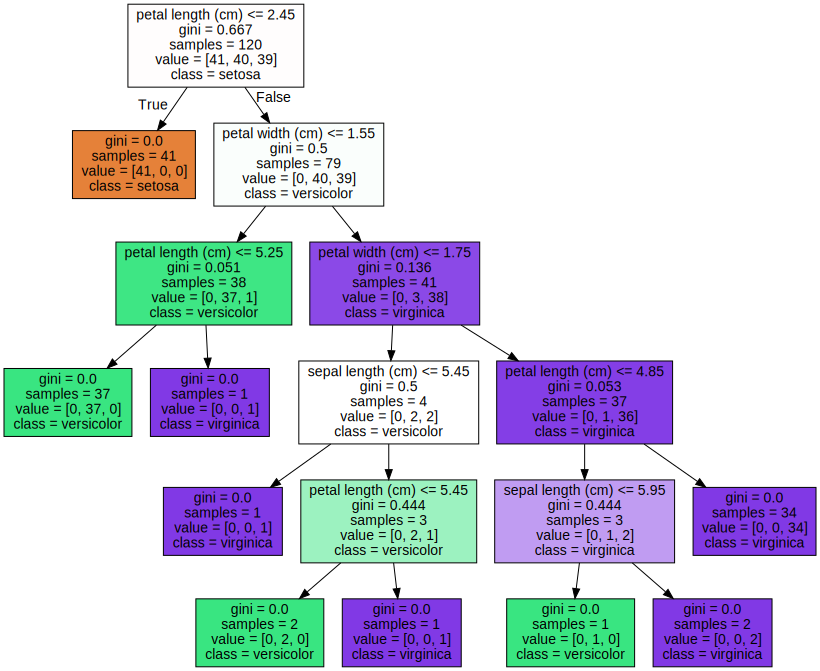

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 결정 트리의 규칙 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

=> 어떻게 구성되는지 살펴보기
 * 리프 노드 : 더 이상 자식 노드가 없는 노드, 최종 클래스(레이블) 값이 결정되는 노드 
 
 <- 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건 충족

 * 브랜치 노드 : 자식 노드가 있는 노드

>* petal length(cm) <= 2.45와 같이 피처의 조건 : 자식 노드를 만들기 위한 규칙 조건 (이 조건이 없으면 리프 노드)
>* gini : 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
>* samples : 현 규칙에 해당하는 데이터 건수
>* value=[] : 클래스 값 기반의 데이터 건수
   + 붓꽃 데이터 세트는 클래스 값으로 0,1,2 (0 : Setosa, 1 : Versicolor, 2 : Virginica)

* 각 노드의 색깔 : 붓꽃 데이터의 레이블 값 (주황색 0:Setosa, 초록색 1:Versicolor, 보라색 2:Virginica) / 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다

* 규칙 생성 로직 미리 제어하지 않으면 매우 복잡한 결정 트리 -> 모델 과적합 -> 하이퍼 파라미터 사용하는 이유

하이퍼 파라미터 변경에 따른 결정 트리 변화
>* max_depth : 결정 트리의 최대 트리 깊이 제어 -> 설정시 더 간단한 결정 트리
>* min_samples_split : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수 제어 
   + ex) min_sampled_splis=4로 설정하면 샘플이 3개일 때 더 이상 자식 규칙 노드를 위한 분할을 하지 않고 리프 노드가 됨 -> 트리 깊이 줄고 더 간결
>* min_samples_leaf : 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값 지정 -> 값 키우면 더 이상 분할하지 않고, 리프 노드가 될 수 있는 조건 완화


* 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 **feature_importances_** 속성 제공
  + ndarray 형태로 값 반환, 피처 순서대로 값 할당
  + 값이 높을수록 해당 피처의 중요도가 높다

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


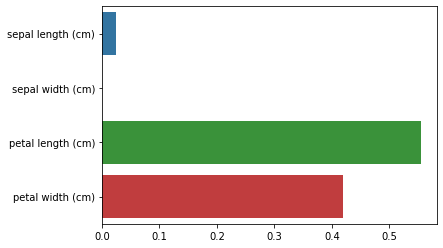

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name,value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 결정 트리 과적합(Overfitting)

결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합 문제 시각화

* 사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 **make_classification()** 함수 제공
  + 호출 시 반환되는 객체 : 피처 데이터 세트와 클래스 레이블 데이터 세트

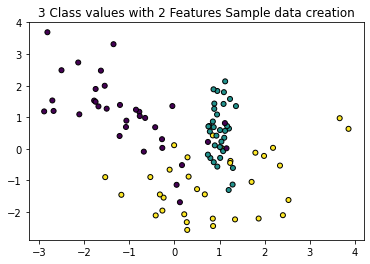

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

* 결정트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인->visualize_boundary() 생성

In [ ]:
import numpy as np

# visualize_boundary() 함수 # Classifier의 Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

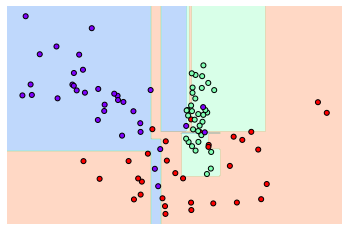

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

=> 결정 기준 경계가 매우 많아지고 복잡 

  -> 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트 예측하면 예측 정확도 떨어져

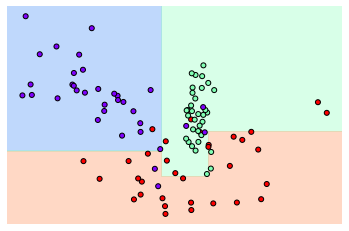

In [ ]:
# min_sampled_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

=> 예측 성능 더 뛰어날 가능성 높아 

(<-학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도 떨어뜨려)

## 03. 앙상블 학습



---

**앙상블 학습** : 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법

* 대부분의 정형 데이터 분류 시 앙상블이 뛰어난 성능
  + 대표적 : 랜덤 포레스트, 그래디언트 부스팅, XGBoost, LightGBM, 스태킹

* 앙상블 학습의 유형

  + 1) 보팅(Voting) : 서로 다른 알고리즘을 가진 여러 개의 분류기가 투표를 통해 최종 예측 결과 결정

  + 2) 배깅(Bagging) : 같은 유형의 알고리즘을 가진 여러 개의 분류기가 데이터 샘플링을 서로 다르게 가져가면서(부트스트래핑 방식), 투표를 통해 최종 예측 결과 결정 
    - 대표적 : 랜덤 포레스트 알고리즘
    - 중첩 허용
 
  + 3) 부스팅(Boosting) : 여러 개의 분류기가 순차적으로 학습을 수행하되, 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 가중치를 부여하면서 학습과 예측을 진행하는 것
    - 대표적 모듈 : 그래디언트 부스트, XGBoost, LightGBM

  + 4) 스태킹 : 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과 예측

### 보팅 유형 - 하드 보팅과 소프트 보팅

1) 하드 보팅 : 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정(다수결 원칙과 비슷)

2) 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

* 일반적으로 소프트 보팅이 예측 성능이 좋아서 더 많이 사용

### 보팅 분류기

사이킷런은 보팅 방식의 앙상블을 구현한 **VotingClassifier** 클래스 제공

* 위스콘신 유방암 데이터 세트 : 유방암의 악성종양, 양성종양 여부를 결정하는 이진 분류 데이터 세트 / load_breast_cancer() 함수 통해 생성 가능

In [ ]:
# 위스콘신 데이터 세트 간략히 살펴보기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


* VotingClassifier 클래스 이용해 보팅 분류기 생성
  + 주요 생성 인자 : estimators(리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받아), voting('hard','soft'라 입력, 기본은 하드 보팅)

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/에측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.947368
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


=> 보팅 분류기가 정확도가 조금 높게 나타났는데, 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능 향상되지 x

=> ML 모델의 성능은 다양한 테스트 데이터에 의해 검증 -> 편향-분산 트레이드오프는 극복해야할 중요한 과제

=> 대부분 결정 트리 알고리즘을 기반으로 한 배깅, 부스팅은 오히려 과적합이 발생해 예측 성능이 떨어져 -> 앙상블 학습에서는 많은 분류기를 결합해 다양한 상황을 학습함으로써 단점을 보완, 편향-분산 트레이드오프의 효과를 극대화

## 04. 랜덤 포레스트

---




### 랜덤 포레스트의 개요 및 실습

배깅 : 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘

배깅의 대표적인 알고리즘 = 랜덤 포레스트

* 비교적 빠른 수행 속도, 다양한 영역에서 높은 예측 성능
* 결정 트리 기반 알고리즘, 쉽고 직관적
* 부트스트래핑 분할 방식 : 여러 개의 데이터 세트를 중첩되게 분리하는 것
  + 서브세트 데이터 건수는 전체 데이터 건수와 동일, 개별 데이터가 중첩되어 만들어져

* 사이킷런은 **RandomForestClassifier**클래스 통해 랜덤 포레스트 기반의 분류 지원



In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

# 사용자 행동 데이터셋에 DataFrame을 반환하는 함수
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/content/drive/MyDrive/data/human_activity/features.txt',sep='\s+', header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. Column 명은 feature_name 적용
    My_X_train = pd.read_csv('/content/drive/MyDrive/data/human_activity/train/X_train.txt',sep='\s+', names = feature_name)
    My_X_test = pd.read_csv('/content/drive/MyDrive/data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    My_y_train = pd.read_csv('/content/drive/MyDrive/data/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    My_y_test = pd.read_csv('/content/drive/MyDrive/data/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return My_X_train, My_X_test, My_y_train, My_y_test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

* 트리 기반의 앙상블 알고리즘

: 하이퍼 파라미터가 너무 많고, 튜닝 위한 시간 많이 소모, 예측 성능이 크게 향상되는 경우 많지 않아

* 랜덤 포레스트의 하이퍼 파라미터
  + n_estimators : 랜덤 포레스트에서 결정 트리의 개수 지정, 디폴트 10개
  + max_features : 결정 트리에 사용된 max_features 파라미터와 동일, 디폴트 'auto','sqrt'
  + max_depth나 min_samples_leaf : 결정 트리에서와 똑같이 적용

> GridSearchCV 를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)    # n_jobs= -1 파라마터 추가 시 모든 CPU 코어 이용해 학습 가능
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


=> n_estimators:100, max_depth:10, min_samples_leaf:8, min_samples_split:8일 때 91.68% 평균 정확도

In [ ]:
# n_estimators를 300으로 증가시키고, 다시 RandomForestClassifier 학습시킨 뒤 예측 성능 측정
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


=> 별도의 테스트 데이터 세트에서 수행한 예측 정확도 수치 : 약 91.65%

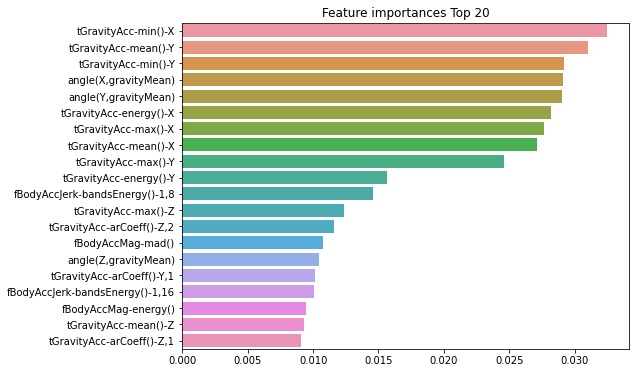

In [ ]:
# feature_importances_ 속성 이용해 피처의 중요도 구하고 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

=> tGravityAcc-min()-X, tGravitiyAcc-mean()-X, tGravitiyAcc-min()-Y 등이 높은 피처 중요도

## 05. GBM(Gradient Boosting Machine)



---



### GBM의 개요 및 실습

* 부스팅 알고리즘 : 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

  + 대표적 - AdaBoost와 그래디언트 부스트

* 에이다 부스트(AdaBoost) : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
>  + Step 1 : 첫 번째 약한 학습기가 분류 기준 1로 +와 - 분류
>  + Step 2 : 이 오류 데이터에 대해서 가중치 값 부여
>  + Step 3 : 두 번째 약한 학습기가 분류 기준 2로 +와 - 분류
>  + Step 4 : 잘못된 분류된 이 - 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있게 더 큰 가중히 부여
>  + Step 5 : 세 번째 약한 학습기가 분류 기준 3으로 +와 - 분류
>  + Step 6 : 첫 번째, 두 번째, 세 번째 약한 학습기 모두 결합한 결과 예측

* GBM(Gradient Boosting Machine) : 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법을 이용하는 것이 큰 차이
  + 경사 하강법 : 오류식 h(x)=y-F(x) (실제 값 - 예측값) 를 최소화하는 방향성을 가지고 반복적으로 가중치 값 업데이트
  + GBM도 분류, 회귀 가능
* 사이킷런은 GBM 기반의 분류 위해 **GradientBoostingClassifier**클래스 제공

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 818.6 초


=> 93.76%의 예측 정확도. 일반적으로 GBM이 랜덤 포레스트보다 예측 성능 뛰어나 but 수행 시간 오래 걸려

### GBM 하이퍼 파라미터 및 튜닝

> * GBM 하이퍼 파라미터
  + n_estimators, max_depth, max_features는 이전과 동일
  + loss : 경사 하강법에서 사용할 비용 함수 지정, 기본값 'deviance'
  + learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률, 기본값은 0.1
    - 작은 값 적용 시 최소 오류 값 찾아 예측 성능 높아질 가능성 높지만 너무 작게 설정하면 찾지 못할 수도
    - 큰 값 적용 시 최소 오류 값 찾지 못하고 지나쳐 버려 예측 성능 떨어질 가능성 높지만 빠른 수행 가능
    - learning_rate는 n_estimators와 상호 보완적으로 조합해 사용 (learning_rate를 작게 하고 n_estimators 크게 하면 예측 성능 조금씩 좋아지지만 수행 시간 너무 오래 걸려)
  + n_estimators : weak learner의 개수, 기본값 100
    - 개수 많을수록 에측 성능 일정 수준까지 좋아지나 수행 시간 오래 걸려
  + subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율, 기본값 1(=전체 학습 데이터 기반으로 학습)
    - 과적합 염려되는 경우 subsample을 1보다 작은 값으로 설정

In [ ]:
# n_estimator를 100,500으로 learning_rate를 0.05, 0.1로 제어
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

=> learning_rate가 0.05, n_estimators가 500일 때 90.1% 정확도

In [ ]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행.
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

=> 테스트 데이터 세트에서 약 94.1%의 정확도

=> GBM은 과적합에도 강한 뛰어난 예측 성능 가진 알고리즘 but 수행 시간이 오래 걸려